In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analyzing data

In [49]:
dataset=pd.read_csv("../00_data/SMSSpamCollection.txt",sep='\t')
dataset.to_csv("../00_data/spam_detection.csv",index=False)
#Data Loading
messages = [line.rstrip() for line in open('../00_data/spam_detection.csv')]
print(len(messages))
#Appending column headers
messages = pd.read_csv('../00_data/spam_detection.csv',names=["label", "message"])

5574


In [50]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [51]:
messages.shape

(5572, 2)

In [52]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [53]:
message_target=messages['label'] 
print(message_target.head(3))

0     ham
1     ham
2    spam
Name: label, dtype: object


# Preprocessing

In [ ]:
import nltk
nltk.download('all')

In [55]:
from nltk.tokenize import word_tokenize

def split_tokens(message):
  message = message.lower()
  word_tokens = word_tokenize(message)
  return word_tokens

messages['tokenized_message'] = messages.apply(lambda row: split_tokens(row['message']),axis=1)

In [56]:
messages

,label,message,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will ü b going to esplanade fr home?,"[will, ü, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, ,, *, was, in, mood, for, that, ., so, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"[the, guy, did, some, bitching, but, i, acted,..."


In [57]:
from nltk.stem.wordnet import WordNetLemmatizer
def split_into_lemmas(message):
    lemma = []
    lemmatizer = WordNetLemmatizer()
    for word in message:
        a=lemmatizer.lemmatize(word)
        lemma.append(a)
    return lemma
messages['lemmatized_message'] = messages.apply(lambda row: split_into_lemmas(row['tokenized_message']),axis=1)
print('Tokenized message:',messages['tokenized_message'][11])
print('Lemmatized message:',messages['lemmatized_message'][11])

Tokenized message: ['six', 'chances', 'to', 'win', 'cash', '!', 'from', '100', 'to', '20,000', 'pounds', 'txt', '>', 'csh11', 'and', 'send', 'to', '87575.', 'cost', '150p/day', ',', '6days', ',', '16+', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info']
Lemmatized message: ['six', 'chance', 'to', 'win', 'cash', '!', 'from', '100', 'to', '20,000', 'pound', 'txt', '>', 'csh11', 'and', 'send', 'to', '87575.', 'cost', '150p/day', ',', '6days', ',', '16+', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info']


In [58]:
from nltk.corpus import stopwords

def stopword_removal(message):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = []
    filtered_sentence = ' '.join([word for word in message if word not in stop_words])
    return filtered_sentence

messages['preprocessed_message'] = messages.apply(lambda row: stopword_removal(row['lemmatized_message']),axis=1)
Training_data=pd.Series(list(messages['preprocessed_message']))
Training_label=pd.Series(list(messages['label']))
print(Training_data[0])
print(Training_label[0])

go jurong point , crazy .. available bugis n great world la e buffet ... cine got amore wat ...
ham


Why Feature Extraction is important?


To perform machine learning on text documents, you first need to turn the text content into numerical feature vectors.

 - Bag of Words (BOW) is one of the most widely used methods for generating features in Natural Language Processing. 
 - Representing/Transforming a text into a bag of words helps to identify various measures to characterize the text.
 - Predominantly used for calculating the term(word) frequency or the number of times a term occurs in a document/sentence.
 - It can be used as a feature for training the classifier.

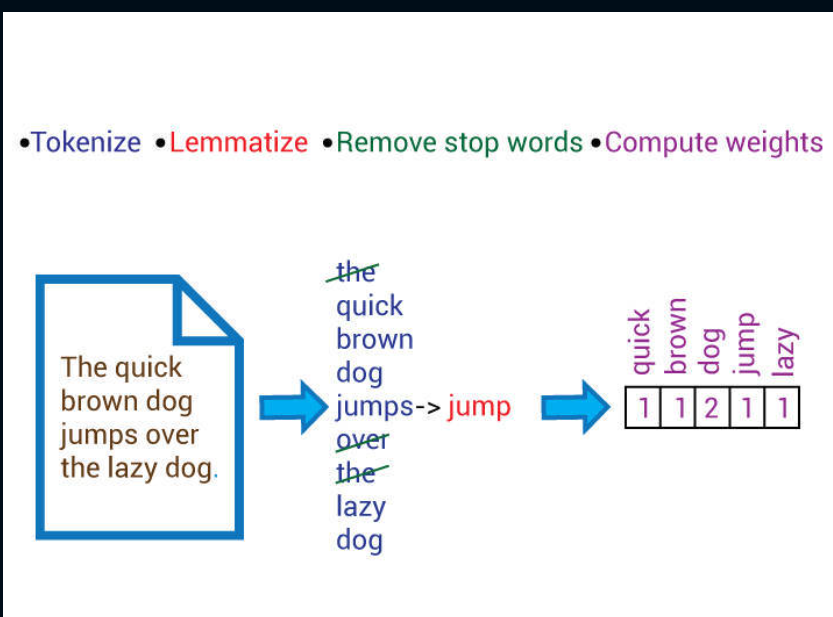

The Term Document Matrix (TDM) is a matrix that contains the frequency of occurrence of terms in a collection of documents.

-In a TDM, the rows represent terms and columns represent the documents

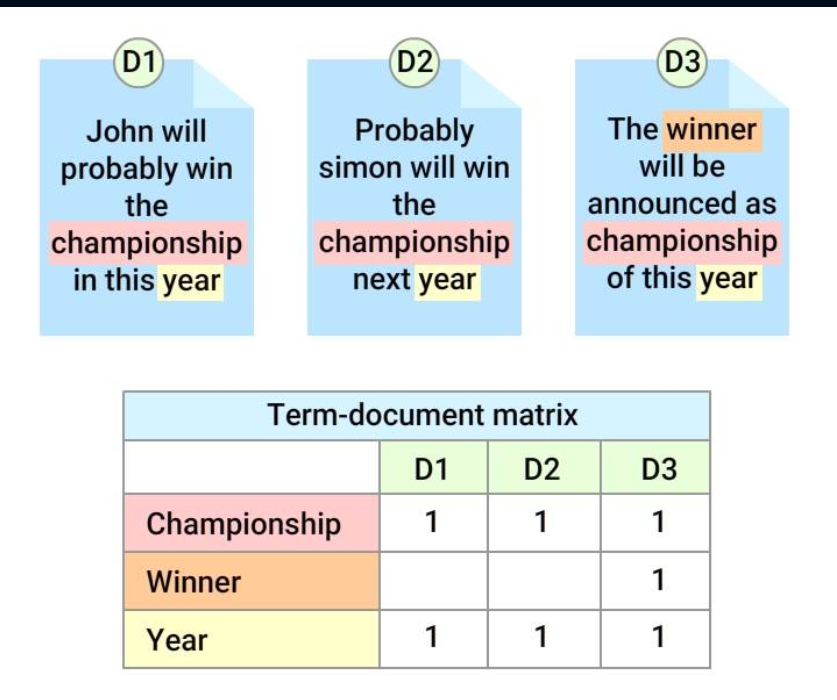

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(ngram_range=(1, 2), min_df = (1/len(Training_label)), max_df = 0.7)
Total_Dictionary_TDM = tf_vectorizer.fit(Training_data)
message_data_TDM = Total_Dictionary_TDM.transform(Training_data)
message_data_TDM

<5572x40215 sparse matrix of type '<class 'numpy.int64'>'
	with 93333 stored elements in Compressed Sparse Row format>

In a Term Frequency Inverse Document Frequency (TFIDF) matrix, the term importance is expressed by Inverse Document Frequency (IDF).

IDF diminishes the weight of the most commonly occurring words and increases the weightage of rare words.

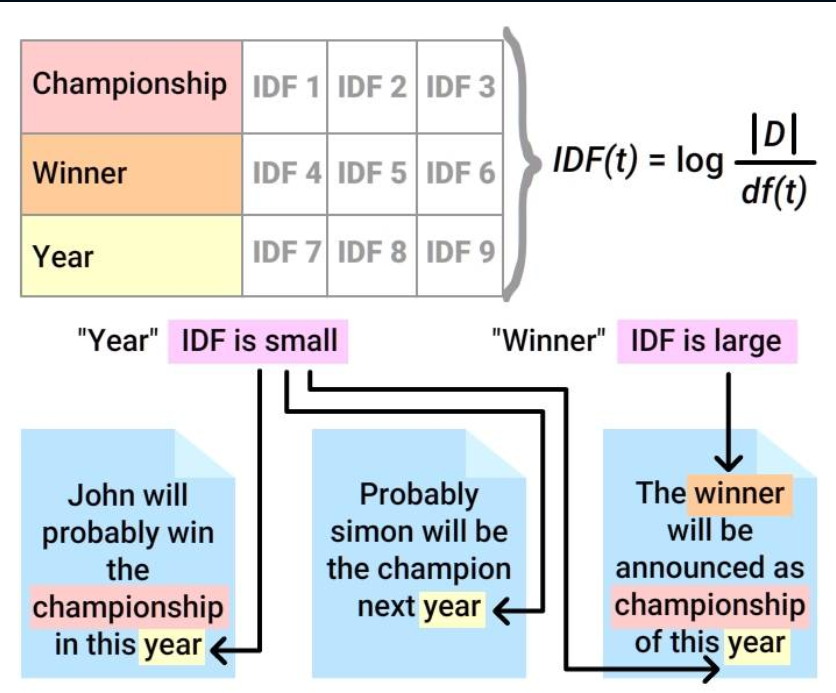

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df = (1/len(Training_label)), max_df = 0.7)
Total_Dictionary_TFIDF = tfidf_vectorizer.fit(Training_data)
message_data_TFIDF = Total_Dictionary_TFIDF.transform(Training_data)
message_data_TFIDF

<5572x40215 sparse matrix of type '<class 'numpy.float64'>'
	with 93333 stored elements in Compressed Sparse Row format>

# Classification

In [61]:
from sklearn.model_selection import train_test_split
train_data,test_data, train_label, test_label = train_test_split(message_data_TDM, Training_label, test_size=.1)

In [62]:
#Creating a decision classifier model

from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier() #Model training
classifier = classifier.fit(train_data, train_label) #After being fitted, the model can then be used to predict the output.
message_predicted_target = classifier.predict(test_data)
score = classifier.score(test_data, test_label)
print('Decision Tree Classifier : ',score)

Decision Tree Classifier :  0.9713261648745519


In [63]:
#  Stochastic gradient descent

# It is used for large scale learning
# It supports different loss functions & penalties for classification

seed=7
from sklearn.linear_model import SGDClassifier
sgd_classifier =  SGDClassifier(loss='modified_huber', shuffle=True,random_state=seed)
sgd_classifier = sgd_classifier.fit(train_data, train_label)
score = sgd_classifier.score(test_data, test_label)
print('SGD classifier : ',score)

SGD classifier :  0.978494623655914


In [64]:
# Support Vector Machine(SVM) is effective in high-dimensional spaces.
# It is effective in cases where the number of dimensions is greater than the number of samples.
# It works well with a clear margin of separation.

from sklearn.svm import SVC
classifier = SVC(kernel="linear", C=0.025,random_state=seed)
classifier = classifier.fit(train_data, train_label)
score = classifier.score(test_data, test_label)
print('SVM Classifier : ',score)

SVM Classifier :  0.974910394265233


In [65]:
# random Forest classifier

# Controls over fitting
# Here, a random forest fits a number of decision tree classifiers on 
# various sub-samples of the dataset and uses averaging to improve the predictive accuracy.


from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10,random_state=seed)
classifier = classifier.fit(train_data, train_label)
score = classifier.score(test_data, test_label)
print('Random Forest Classifier : ',score)

Random Forest Classifier :  0.8745519713261649


In [66]:
# The classification algorithms in machine learning are parameterized. 
# Modifying any of those parameters can influence the results. 
# So algorithm/model tuning is essential to find out the best model.

# For example, let's take the Random Forest Classifier and change 
# the values of a few parameters (n_ estimators,max_ features)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5, n_estimators=15, max_features=60,random_state=seed)
classifier = classifier.fit(train_data, train_label)
score=classifier.score(test_data, test_label)
print('Random Forest classification after model tuning',score)

Random Forest classification after model tuning 0.8745519713261649


# Cross Validation

It is a methodological mistake to test and train on the same dataset. This is because the classifier would fail to predict correctly for any unseen data. This could result in overfitting.

To avoid this problem,

Split the data to train set, validation set and test set.

Training Set: The data used to train the classifier.

Validation Set: The data used to tune the classifier model parameters i.e., to understand how well the model has been trained (a part of training data).

Testing Set: The data used to evaluate the performance of the classifier (unseen data by the classifier).

This will help you know the efficiency of your model.

 - Cross validation is a model validation technique to evaluate the performance of a model on unseen data (validation set).

 - It is a better estimate to evaluate testing accuracy than training accuracy on unseen data.

Points to remember:

 - Cross validation gives high variance if the testing set and training set are not drawn from same population.

 - Allowing training data to be included in testing data will not give actual performance results.

In cross validation, the number of samples used for training the model is reduced and the results depend on the choice of the pair of training and testing sets.

You can refer to the various CV approaches at (https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators-with-stratification-based-on-class-labels)

In [67]:
# Stratified Shuffle Split
# The StratifiedShuffleSplit splits the data by taking an equal 
# number of samples from each class in a random manner.

# StratifiedShuffleSplit would suit our case study as the dataset has a 
# class imbalance which can be seen from the following code snippet:

seed=7
from sklearn.model_selection import StratifiedShuffleSplit
###cross validation with 10% sample size
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1, random_state=seed)
sss.get_n_splits(message_data_TDM,Training_label)
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=7, test_size=0.1,
            train_size=None)


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
classifiers = [
    DecisionTreeClassifier(),
    SGDClassifier(loss='modified_huber', shuffle=True),
    SVC(kernel="linear", C=0.025),
    KNeighborsClassifier(),
    OneVsRestClassifier(svm.LinearSVC()),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=10),
   ]
for clf in classifiers:
    score=0
    for train_index, test_index in sss.split(message_data_TDM,Training_label):
       X_train, X_test = message_data_TDM [train_index], message_data_TDM [test_index]
       y_train, y_test = Training_label[train_index], Training_label[test_index]
       clf.fit(X_train, y_train)
       score = score + clf.score(X_test, y_test)
    print(score)

0.9695340501792115
0.9659498207885304
0.9695340501792115
0.9014336917562724
0.974910394265233
0.8655913978494624


The above code uses ensemble of classifiers for cross validation. It helps to select the best classifier based on the cross validation scores. The classifier with the highest score can be used for building the classification model.

# Performance Evaluation

In [69]:
from sklearn.metrics import accuracy_score
print('Accuracy Score',accuracy_score(test_label,message_predicted_target))  
classifier = classifier.fit(train_data, train_label)
score=classifier.score(test_data, test_label)
test_label.value_counts()

Accuracy Score 0.9713261648745519


ham     488
spam     70
dtype: int64

In [70]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix',confusion_matrix(test_label,message_predicted_target))

Confusion Matrix [[483   5]
 [ 11  59]]


[[488   0]
 [ 12  58]]


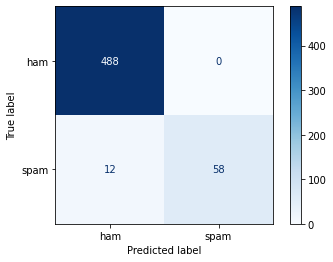

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(sgd_classifier, test_data, test_label, display_labels=['ham','spam'], cmap=plt.cm.Blues)
print(disp.confusion_matrix)

In [72]:
# The classification_report function shows a text report with the commonly used classification metrics.

from sklearn.metrics import classification_report
target_names = ['spam', 'ham']
print(classification_report(test_label, message_predicted_target, target_names=target_names))

              precision    recall  f1-score   support

        spam       0.98      0.99      0.98       488
         ham       0.92      0.84      0.88        70

    accuracy                           0.97       558
   macro avg       0.95      0.92      0.93       558
weighted avg       0.97      0.97      0.97       558



Precision

When a positive value is predicted, how often is the prediction correct?
Recall

It is the true positive rate.

When the value is positive, how often does the prediction turn out to be correct?

To know more, Refer (https://scikit-learn.org/stable/modules/model_evaluation.html)